




<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

###
<div class="alert alert-block alert-info" style="margin-top: 20px">

1. Exercise - racial bias  
2. [Pie Charts]
3.  Pandas/Matplotlib Exercises in-class
4.  [Review](#12)<br>     
</div>
<hr>

<h2> Analyzing and filtering racial bias from 2015 to 2019 </h2>
1) Read in the csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Bias_crime_2015_2019.csv')

In [2]:
df

,Race_Ethnicity,2015,2016,2017,2018,2019
0,Anti-White,613,720,741,762,666
1,Anti-Black or African American,1745,1739,2013,1943,1930
2,Anti-American Indian or Alaska Native,131,154,251,194,119
3,Anti-Asian,111,113,131,148,158
4,Anti-Native Hawaiian or Other Pacific Islander,4,9,16,20,21
5,Anti-Multiple Races- Group,113,136,180,137,134
6,Anti-Arab,37,51,102,82,95
7,Anti-Hispanic or Latino,299,344,427,485,527
8,Anti-Other Race/Ethnicity/Ancestry,257,23,270,276,313


2) Find the differences in bias from 2019 to 2015 and plot this difference using a barchart with race on the x-axis and the associated bias on the y-axis.

,Race_Ethnicity,2015,2016,2017,2018,2019,Difference_Bias_2015_2019
0,Anti-White,613,720,741,762,666,53
1,Anti-Black or African American,1745,1739,2013,1943,1930,185
2,Anti-American Indian or Alaska Native,131,154,251,194,119,-12
3,Anti-Asian,111,113,131,148,158,47
4,Anti-Native Hawaiian or Other Pacific Islander,4,9,16,20,21,17
5,Anti-Multiple Races- Group,113,136,180,137,134,21
6,Anti-Arab,37,51,102,82,95,58
7,Anti-Hispanic or Latino,299,344,427,485,527,228
8,Anti-Other Race/Ethnicity/Ancestry,257,23,270,276,313,56


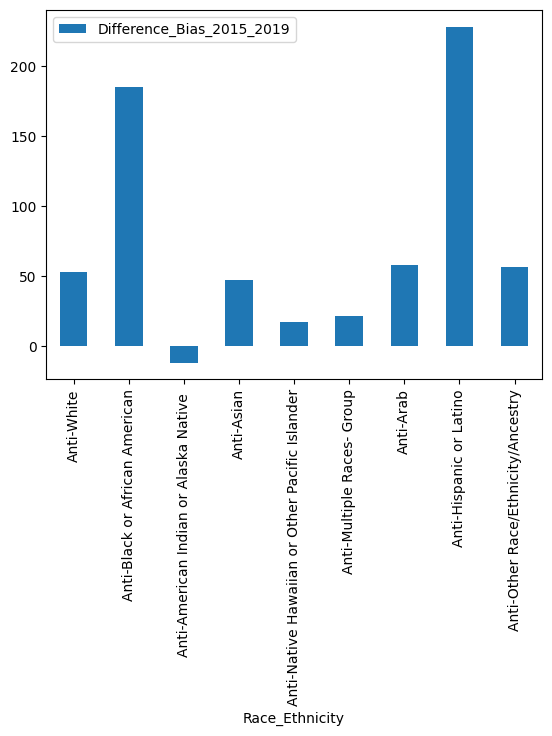

In [3]:
df['Difference_Bias_2015_2019'] = df['2019']-df['2015']
df.plot.bar(x='Race_Ethnicity', y='Difference_Bias_2015_2019')
df

3) Get the max bias in the year 2015:

In [4]:
df_max = df['2015'].max()
print(df_max)

1745


<h2> Pie Chart to highlight the largest groups in this dataset </h2>
ax.pie(labels, explode, figsize) <br>
We can configure explode to highlight our largest group in the pie chart.

[0, 0.05, 0, 0, 0, 0, 0, 0, 0]


<Axes: ylabel='2015'>

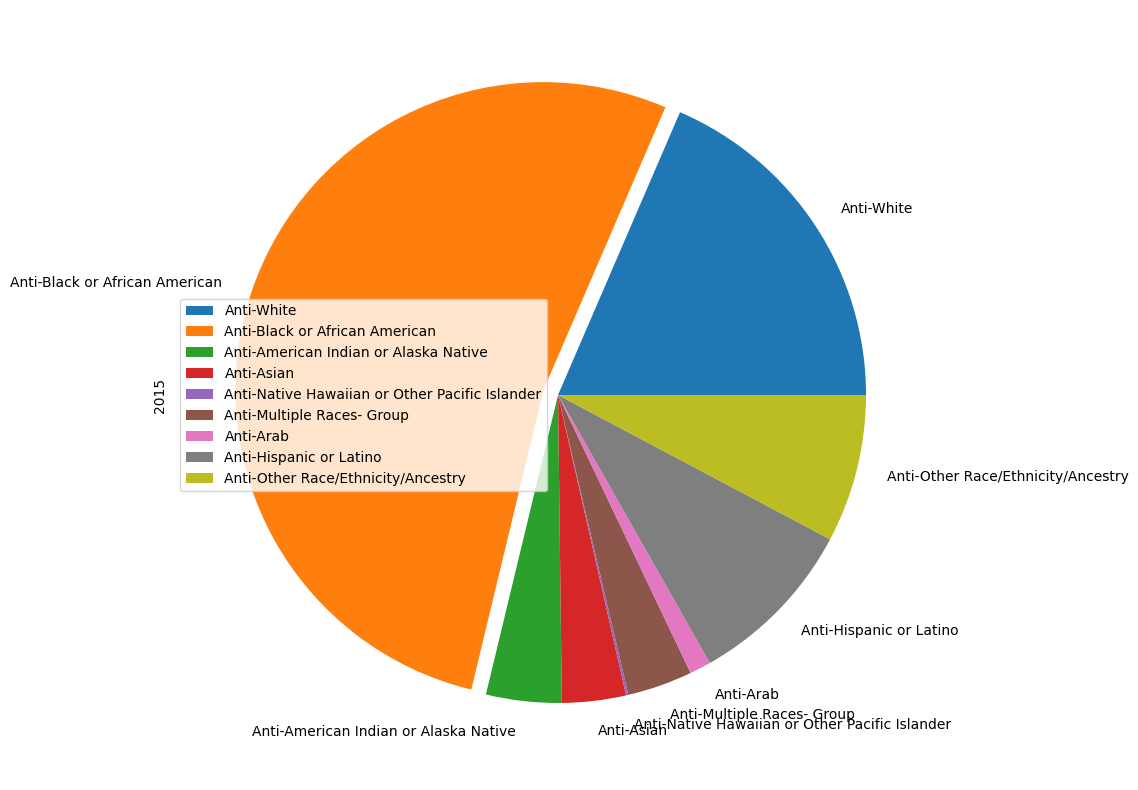

In [5]:
eth_dict = zip(df['Race_Ethnicity'].tolist(),df['2015'].tolist())
eth_dict = dict(eth_dict)

explode = [.05 if v== df_max else 0 for k,v in eth_dict.items()] #only 'explode' the largest slide
print(explode)
pie_data = pd.DataFrame({'2015': df['2015'].tolist()}, index = df['Race_Ethnicity'])
pie_data.plot.pie(y = '2015', explode=explode, figsize = (10,10))


[613, 1745, 131, 111, 4, 113, 37, 299, 257]
[0.05, 0.05, 0, 0, 0, 0, 0, 0, 0]


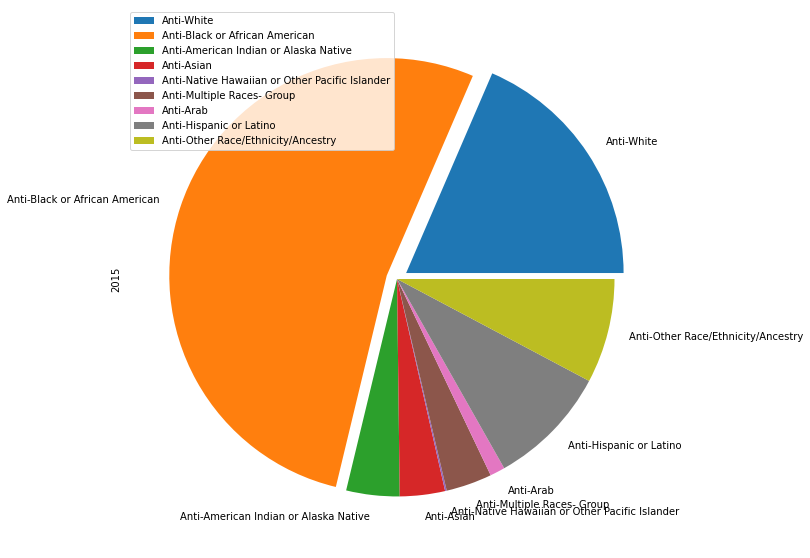

In [ ]:
# Show top 2 items
eth_dict = zip(df['Race_Ethnicity'].tolist(),df['2015'].tolist())
eth_dict = dict(eth_dict)
x = [v for k,v in eth_dict.items()]
print(x)
explode = [.05 if v> 300 else 0 for k,v in eth_dict.items()]
print(explode)
pie_data = pd.DataFrame({'2015': df['2015'].tolist()}, index = df['Race_Ethnicity'])
pie_data.plot.pie(y = '2015', explode=explode, figsize = (10,10))

4) Find the Top 3 groups in 2015 and plot a pie chart that explodes them out.

[613, 1745, 131, 111, 4, 113, 37, 299, 257]
[0.05, 0.05, 0, 0, 0, 0, 0, 0.05, 0]


<Axes: ylabel='2015'>

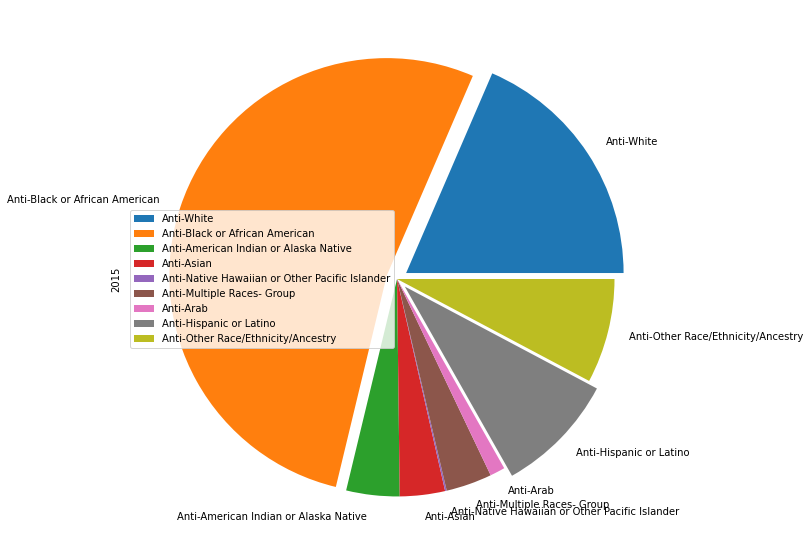

In [ ]:
eth_dict = zip(df['Race_Ethnicity'].tolist(),df['2015'].tolist())
eth_dict = dict(eth_dict)
x = [v for k,v in eth_dict.items()]
print(x)
x.sort()
top3=x[-3:]
explode = [.05 if v in top3 else 0 for k,v in eth_dict.items()]
print(explode)
pie_data = pd.DataFrame({'2015': df['2015'].tolist()}, index = df['Race_Ethnicity'])
pie_data
pie_data.plot.pie(y = '2015', explode=explode, figsize = (10,10))

## NYPD Historical Arrests EDA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [8]:
data = pd.read_csv('NYPD_Arrests_Data__Historic_.csv', low_memory=False)

In [9]:
data.dataframeName = 'NYPD_Complaint_Data_Historic.csv'

In [10]:
data.shape

(4798339, 18)

In [11]:
data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [12]:
data.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,4.798339e+06,4.798119e+06,4.789469e+06,4.798339e+06,4.798329e+06,4.798338e+06,4.798338e+06,4.798338e+06,4.798338e+06
mean,9.117932e+07,5.144543e+02,3.033707e+02,6.054391e+01,1.259917e+00,1.005356e+06,2.152677e+05,4.075731e+01,-7.392378e+01
std,4.849304e+07,2.622323e+02,1.827257e+02,3.427400e+01,9.197036e+00,1.993310e+04,1.683939e+05,4.551971e-01,7.194385e-02
min,9.926901e+06,0.000000e+00,1.010000e+02,1.000000e+00,0.000000e+00,9.133570e+05,1.211310e+05,4.049891e+01,-7.425494e+01
25%,5.586951e+07,3.390000e+02,1.260000e+02,3.300000e+01,0.000000e+00,9.933730e+05,1.869160e+05,4.067967e+01,-7.396705e+01
50%,8.190439e+07,5.110000e+02,3.410000e+02,5.200000e+01,0.000000e+00,1.004892e+06,2.095955e+05,4.074196e+01,-7.392549e+01
75%,1.401210e+08,7.500000e+02,3.510000e+02,8.400000e+01,0.000000e+00,1.015768e+06,2.366140e+05,4.081609e+01,-7.388618e+01
max,1.917192e+08,9.970000e+02,9.950000e+02,1.230000e+02,9.700000e+01,1.067298e+06,8.202360e+06,6.208307e+01,-7.368178e+01


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798339 entries, 0 to 4798338
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
dtypes: float64(7), int64(2), object(9)
memory usage: 659.0+ MB


<h2> Exercise </h2>
1) Find the incident count of the top 10 precincts ('ARREST_PRECINCT' is the precinct ID where the incident occurred) <br>
2) Store the top 10 precincts into a new dataframe with the precinct ID as an int column and the incident count as  another int column. <br>
3) Plot the new dataframe, with the x-axis as precinct ID and the y-axis as incident/complaint count. <br>
4) Find the top 10 incident descriptions
('OFNS_DESC') by total count and print them. Store them in a separate dataframe with columns 'incident description' and 'incident count'. Plot the dataframe as you did above.


In [23]:
# 1) Find the incident count of the top 10 precincts ('ARREST_PRECINCT' is the precinct ID where the incident occurred)

top10 = data['ARREST_PRECINCT'].value_counts().head(10)
top10


ARREST_PRECINCT
14     170873
75     166229
44     154893
40     140381
73     134093
46     120403
43     119193
52     112849
25     108178
103    100027
Name: count, dtype: int64



```
# This is formatted as code
```

2) Store the top 10 precincts into a new dataframe with the precinct ID as an int column and the incident count as  another int column.

In [24]:
# 2) Store the top 10 precincts into a new dataframe with the precinct ID as an int column and the incident count as  another int column.

top10 = top10.reset_index()
top10.columns = ['PRECINCT_ID', 'INCIDENT_COUNT']
top10['PRECINCT_ID'] = top10['PRECINCT_ID'].astype(int)
top10['INCIDENT_COUNT'] = top10['INCIDENT_COUNT'].astype(int)
top10

,PRECINCT_ID,INCIDENT_COUNT
0,14,170873
1,75,166229
2,44,154893
3,40,140381
4,73,134093
5,46,120403
6,43,119193
7,52,112849
8,25,108178
9,103,100027


3) Plot the new dataframe, with the x-axis as precinct ID and the y-axis as incident/complaint count.

> Indented block



<Axes: xlabel='PRECINCT_ID'>

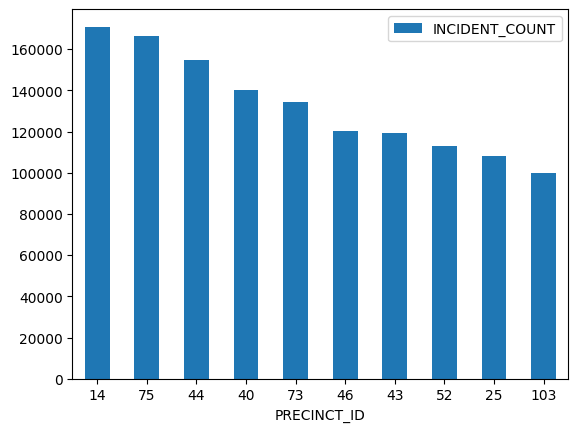

In [17]:
# 3) Plot the new dataframe, with the x-axis as precinct ID and the y-axis as incident/complaint count.

top10.plot.bar(x='PRECINCT_ID', y='INCIDENT_COUNT', rot=0)

4) Find the top 10 incident descriptions
('OFNS_DESC') by total count and print them. Store them in a separate dataframe with columns 'incident description' and 'incident count'. Plot the dataframe as you did above.

In [18]:
# 4a) Find the top 10 incident descriptions, ('OFNS_DESC') by total count and print them. Store them in a separate dataframe with columns 'incident description' and 'incident count'. 

top10_incident = data['OFNS_DESC'].value_counts().head(10)
top10_incident = top10_incident.reset_index()
top10_incident.columns = ['INCIDENT_DESCRIPTION', 'INCIDENT_COUNT']
top10_incident

,INCIDENT_DESCRIPTION,INCIDENT_COUNT
0,DANGEROUS DRUGS,1056378
1,ASSAULT 3 & RELATED OFFENSES,459889
2,OTHER OFFENSES RELATED TO THEFT,304191
3,OTHER STATE LAWS,240418
4,CRIMINAL TRESPASS,196181
5,PETIT LARCENY,188360
6,VEHICLE AND TRAFFIC LAWS,186049
7,DANGEROUS WEAPONS,182926
8,FELONY ASSAULT,181550
9,OTHER TRAFFIC INFRACTION,171304


<Axes: ylabel='INCIDENT_DESCRIPTION'>

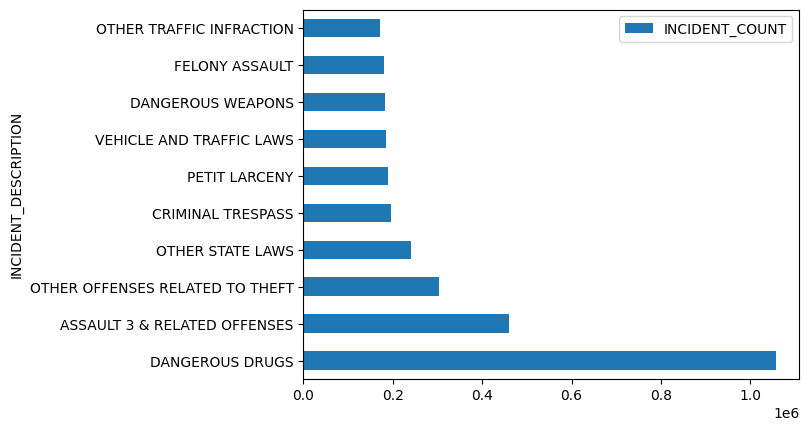

In [20]:
# 4b) Plot the new dataframe, with the x-axis as incident description and the y-axis as incident count.

top10_incident.plot.barh(x='INCIDENT_DESCRIPTION', y='INCIDENT_COUNT', rot=0)

# Extra EDA

In [28]:
data['ARREST_BORO'].value_counts()

ARREST_BORO
K    1334914
M    1303786
B    1097367
Q     895903
S     166361
Name: count, dtype: int64

In [29]:
data

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798334,173142136,01/01/2018,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2403002,M,B,41,0.0,25-44,F,WHITE HISPANIC,1013086.0,236614.0,40.816088,-73.895824
4798335,173135232,01/01/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,44,0.0,25-44,M,BLACK HISPANIC,1007649.0,243339.0,40.834562,-73.915443
4798336,173134328,01/01/2018,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601503,F,M,10,0.0,45-64,M,BLACK,983620.0,208914.0,40.740105,-74.002275
4798337,173134322,01/01/2018,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,30,0.0,25-44,M,BLACK HISPANIC,998981.0,242209.0,40.831479,-73.946770


In [45]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data['AGE_GROUP'].value_counts()[:5])

AGE_GROUP
25-44    2202168
18-24    1274230
45-64     880740
<18       402008
65+        38998
Name: count, dtype: int64


In [46]:
data['AGE_GROUP'].unique()[:5]

array(['25-44', '18-24', '45-64', '65+', '<18'], dtype=object)

In [ ]:
# need to clean up some of this data

data = data.groupby('AGE_GROUP').filter(lambda x: len(x)>10)
data['AGE_GROUP'].unique()

array(['25-44', '18-24', '45-64', '65+', '<18'], dtype=object)

In [47]:
ages = data['AGE_GROUP'].value_counts()[:5]

age_counts = pd.DataFrame({'Age_Group':ages.index, 'COMPLAINT_COUNT':ages.values})

age_counts

,Age_Group,COMPLAINT_COUNT
0,25-44,2202168
1,18-24,1274230
2,45-64,880740
3,<18,402008
4,65+,38998


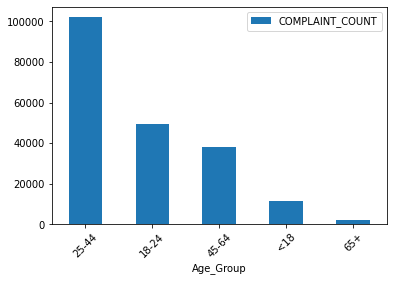

In [ ]:
ax = age_counts.plot.bar(x='Age_Group', y='COMPLAINT_COUNT', rot=45)

In [41]:
data['PERP_RACE'].value_counts()

PERP_RACE
BLACK                             2330925
WHITE HISPANIC                    1249880
WHITE                              579414
BLACK HISPANIC                     384279
ASIAN / PACIFIC ISLANDER           193101
UNKNOWN                             48924
AMERICAN INDIAN/ALASKAN NATIVE      10453
OTHER                                1363
Name: count, dtype: int64

In [42]:
races = data['PERP_RACE'].value_counts()

race_counts = pd.DataFrame({'Susp_Race':races.index, 'COMPLAINT_COUNT':races.values})

race_counts

,Susp_Race,COMPLAINT_COUNT
0,BLACK,2330925
1,WHITE HISPANIC,1249880
2,WHITE,579414
3,BLACK HISPANIC,384279
4,ASIAN / PACIFIC ISLANDER,193101
5,UNKNOWN,48924
6,AMERICAN INDIAN/ALASKAN NATIVE,10453
7,OTHER,1363


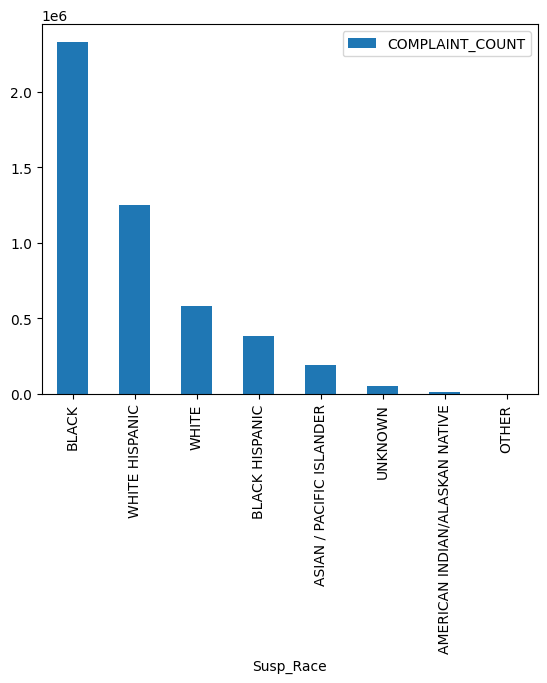

In [33]:
ax = race_counts.plot.bar(x='Susp_Race', y='COMPLAINT_COUNT', rot=90)

In [34]:
data['SUSP_SEX'].value_counts()

KeyError: 'SUSP_SEX'

In [37]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

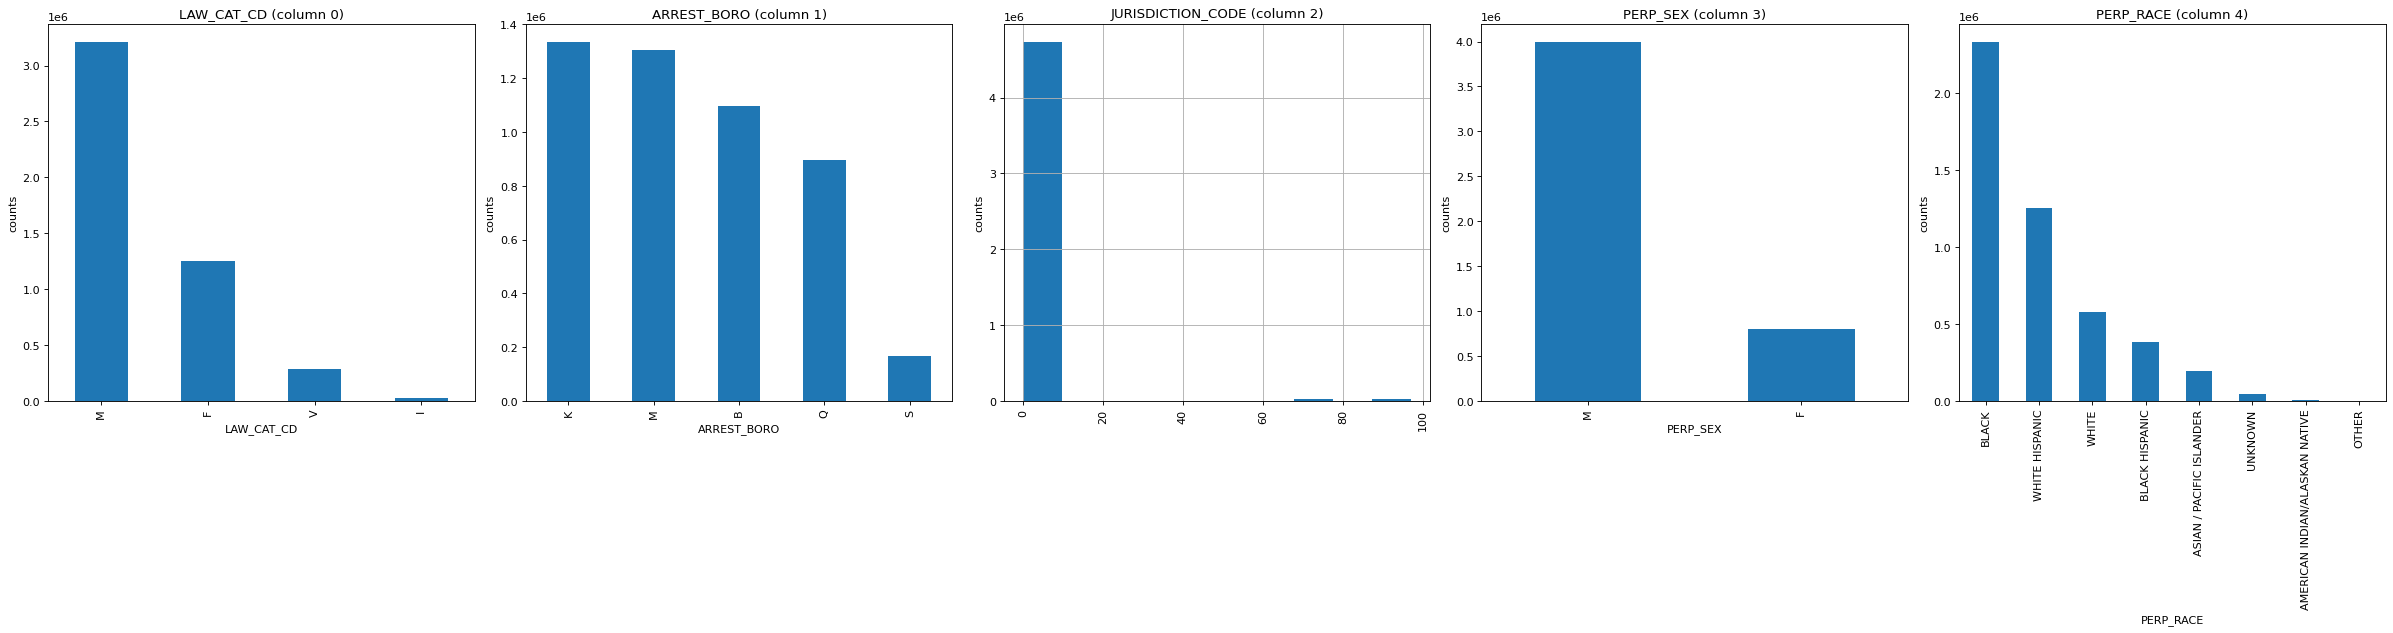

In [38]:
plotPerColumnDistribution(data, 10, 5)

In [ ]:
data.isnull().sum().sum()

52644916

In [39]:
data['e'] = 1
data.sample()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,e
1292677,94767382,02/04/2014,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,20,0.0,25-44,F,BLACK HISPANIC,988302.0,223845.0,40.781086,-73.98537,1


In [ ]:
boro_crime = data.groupby(['BORO_NM']).count()['e']
boro_crime

BORO_NM
BRONX            1484373
BROOKLYN         2035004
MANHATTAN        1645015
QUEENS           1351400
STATEN ISLAND     321394
Name: e, dtype: int64

In [ ]:
#boroDF = boro_crime.to_frame(index=False)

boroDF = pd.DataFrame({'BORO_NAME':boro_crime.index, 'COMPLAINT_COUNT':boro_crime.values})

In [ ]:
boroDF

,BORO_NAME,COMPLAINT_COUNT
0,BRONX,1484373
1,BROOKLYN,2035004
2,MANHATTAN,1645015
3,QUEENS,1351400
4,STATEN ISLAND,321394


In [ ]:
boroDF.columns

Index(['BORO_NAME', 'COMPLAINT_COUNT'], dtype='object')

In [ ]:
boroDF_prop = boroDF.assign(PERCENTAGE = boroDF.COMPLAINT_COUNT / sum(boroDF.COMPLAINT_COUNT))

boroDF_prop['Percentage'] = boroDF['Complaint_Count'] / sum(boroDF.COMPLAINT_COUNT)

In [ ]:
boroDF

,BORO_NAME,COMPLAINT_COUNT
0,BRONX,1484373
1,BROOKLYN,2035004
2,MANHATTAN,1645015
3,QUEENS,1351400
4,STATEN ISLAND,321394


In [ ]:
boroDF_prop

,BORO_NAME,COMPLAINT_COUNT,PERCENTAGE
0,BRONX,1484373,0.217103
1,BROOKLYN,2035004,0.297638
2,MANHATTAN,1645015,0.240598
3,QUEENS,1351400,0.197654
4,STATEN ISLAND,321394,0.047007


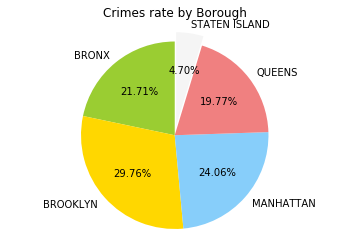

In [ ]:
# Use the proportion of crime rate in each area to make a pie chart
x = boroDF_prop['BORO_NAME']
y = boroDF_prop['PERCENTAGE']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'whitesmoke']

plt.pie(boroDF_prop['PERCENTAGE'], labels=boroDF_prop['BORO_NAME'], colors=colors,
        startangle=90,
        explode = (0, 0, 0,0 ,0.1),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Crimes rate by Borough')
plt.show()